# Stack Overflow Network Analysis
Claas Brüß, Simon Romanski and Maximilian Rünz

## 1 Introduction

There are comprehensive studies on how groups form and work together in a face-to-face team work scenario. However, even though the development of the internet has allowed open platforms for collaboration in a massive scale, little research has been conducted on patterns of collaboration in that domain.

This project analyzes the stackoverflow community representing it as a graph. We are applying network analysis methods to subcommunities for libraries like Numpy in order to understand the structure of the community. 

In a next stage we are comparing the communities to theoretical network models as well as to real network models to obtain insights about work patterns in the community. Finally we will compare those insights with proven psychological models of group work theorey to gain intuition about knowledge transfer and work in these communites. We will show that the shape of group work and knowledge transfer changes by the means of online communities.

In [3]:
%matplotlib inline

import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

# Own modules
import DataProcessing as proc
import DataCleaning as clean

In [6]:
# in epoche
min_time = -1
max_time = -1

min_q_votes = 0
max_q_votes = -1
min_a_votes = 0
max_a_votes = -1
accepted = 1

min_degree = -1
max_degree = -1

only_gc = False

## 2 Data Acquistion

### 2.1 Data processing

In [2]:
# Paths that will be used
posts_path = os.path.join("E:","Uni","DataViz","DataSet","Posts.xml")
questions_path = os.path.join("Questions.json")
answers_path = os.path.join("Answers.json")
edge_list_path = os.path.join("Edges.json")
edge_list_tag_path = os.path.join("Tags")

#### Extract meaningful features

In [3]:
%%time
# Create JSON for questions and answers
proc.split_qa_json_all(questions_path, answers_path, posts_path)

Wall time: 0 ns


#### Create edge list

In [3]:
%%time
# create edge list
proc.create_edge_list_all(questions_path, answers_path, edge_list_path)

#### Split networks by tags

In [3]:
%%time
# split in file for each tag
proc.split_edge_list_tags(edge_list_tag_path, edge_list_path)

Wall time: 7h 8min 18s


#### Order edges by time

In [3]:
%%time
# order by time
proc.order_edge_lists_tags_time(edge_list_tag_path)

Wall time: 3h 17min 30s


#### Format edge list to txt files

In [3]:
%%time
proc.edge_lists_to_txt(edge_list_tag_path)

Wall time: 3h 18min 20s


### 2.2 Data Cleaning

In [2]:
network_path = os.path.join("Tags", "eigen_complete_ordered_list.txt")
network = nx.read_edgelist(network_path,nodetype=int, data=(('time',int),('votes_q', int),('votes_a', int),('accepted', bool)))

In [5]:
# in epoche
min_time = -1
max_time = -1

min_q_votes = 0
max_q_votes = -1
min_a_votes = 0
max_a_votes = -1
accepted = 1

min_degree = -1
max_degree = -1

only_gc = False

#### Filter by attributes

In [4]:
network_cleaned = clean.filter_network_attributes(network, min_time, max_time,\
                min_q_votes, max_q_votes, min_a_votes, max_a_votes, accepted)

#### Filter by node degree

In [5]:
network_cleaned = clean.filter_network_node_degree(network_cleaned, min_degree, max_degree)

#### Only use giant component

In [6]:
if only_gc:
    network_cleaned = clean.filter_network_gc(network_cleaned)

In [7]:
#network_cleaned.edges(data=True)

## 3 Data Exploaration: Network properties

The whole stackoverflow community has more than 8 million users, 15 million questions and 23 million answers on different aspects of different libraries, programming languages and operating systems. 

Hence, we decided to focus on specific widely-used libraries for our investigation. In our case we perform data analysis for a commonly used python library Numpy and compare it to another python library Matlplotlib as well as to a heavily used library for C++ called Eigen. Ultimately we will compare the entire Python community with the Numpy community.

We are starting with some basic properties of the subcommunity. Each node in our graph represents one user.

In [7]:
network_path = os.path.join("Tags", "numpy_complete_ordered_list.txt")
network = nx.read_edgelist(network_path,nodetype=int, data=(('time',int),('votes_q', int),('votes_a', int),('accepted', bool)))
network_cleaned = clean.filter_network_attributes(network, min_time, max_time,\
                min_q_votes, max_q_votes, min_a_votes, max_a_votes, accepted)

if only_gc:
    network_cleaned = clean.filter_network_gc(network_cleaned)
    
len(network.nodes())

21728

We can see that we have roughly 21.700 users.

In [8]:
len(network.edges())

40452

And we have roughly 40.500 edges corresponding to one answer each. 

In [11]:
nx.number_connected_components(network)

1033

The number of connected components describes the amount of completely seperated groups in the community that do not interfere with each other. A deeper analysis shows that there is in fact one big group and many very small groups.

In [10]:
network.number_of_selfloops()

1606

The self-loops represent answers that users have given to their own questions. While this seems to be counterintuitive, the number is reasonable if one considers the fact that users sometimes give updated on the status of their problems.

### Degree distribution

To get insights about the user behaviour, i.e., how many question do users ask and answer we war plotting a degree distribution in the following:

(array([  2.16940000e+04,   2.30000000e+01,   6.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.49100000e+02,   2.97200000e+02,
          4.45300000e+02,   5.93400000e+02,   7.41500000e+02,
          8.89600000e+02,   1.03770000e+03,   1.18580000e+03,
          1.33390000e+03,   1.48200000e+03]),
 <a list of 10 Patch objects>)

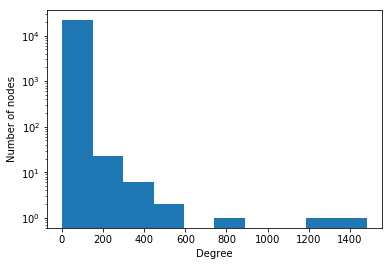

In [12]:
np.asarray(list(network.degree(network.nodes()).values())).mean()
degrees_dict = network.degree()
degrees = np.asarray([ [key,degrees_dict[key]] for key in degrees_dict])
plt.figure(1)
plt.yscale('log')
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.hist(degrees[:,1])

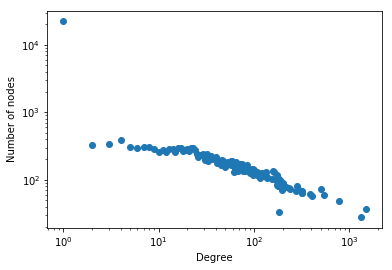

In [13]:
plt.figure(2)
degrees_unique = np.unique(degrees[:,1])
degrees_num, tmp = np.histogram(degrees, bins=degrees_unique.shape[0])
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.scatter(degrees_unique, degrees_num)

The plots show a distribution that resembles a power-law distribution. Note the double-logarithmic scaling of the scatter plot. We can see that the majority of users asks or answers less than one question. The amount of people answering multiple question goes down drastically.

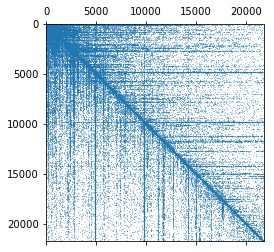

In [17]:
plt.figure(3)
adjacency = nx.adjacency_matrix(network)
plt.spy(adjacency, markersize=0.1);

Next we are interested in how well the graph is connected. Therefore we are computing the average clustering coefficient:

$\langle C \rangle = \frac{1}{N}\sum^N_{i=1}{C_i} = \frac{1}{N}\sum^N_{i=1}{\frac{2L_i}{k_i(k_i-1)}}$ for $k_i \not\in [0,1]$ where $L_i$ denotes the number of links between the neighbors $k_i$ of node $i$.

In [18]:
print("Clustering coeeficient:")
print(nx.average_clustering(network))


Clustering coeeficient:
0.019031623710123964


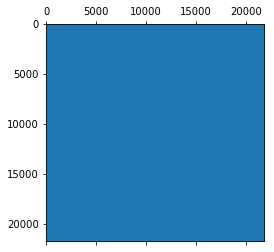

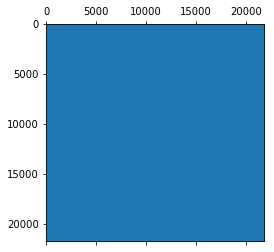

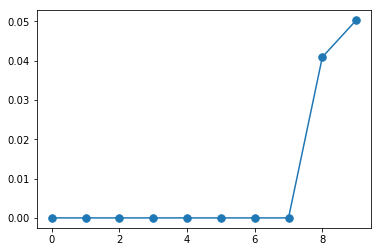

In [21]:
laplacian = nx.laplacian_matrix(network)
plt.figure(4)
plt.spy(laplacian)
laplacian = sparse.csr_matrix(laplacian).asfptype()
plt.figure(5)
plt.spy(laplacian)
eigenvalues, eigenvectors = sparse.linalg.eigsh(laplacian, k=10, which='SA')
plt.figure(6)
plt.plot(eigenvalues, '.-', markersize=15)

### Giant Component

In a further analysis we want to understand if we have a giant component what percentage of the users is part of it

In [22]:
comps = nx.connected_component_subgraphs(network)
max_comp = max(comps, key=len)
len(max_comp.nodes())

19711

As we can see, 19711 users are forming a giant component which is approximately 90.72% of the entire Numpy community.

### Distribution of attributes

## Network evolution

In [23]:
print('My network has {} nodes.'.format(len(network.nodes())))
print('My network has {} edges.'.format(network.size()))
N = len(network.nodes())
L = network.size()
p = 2*L/((N-1)*N)
er = nx.erdos_renyi_graph(N, p)
m  = int((L/N)+1)
ba = nx.barabasi_albert_graph(N, m)
print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
print('My Erdős–Rényi network has {} edges.'.format(er.size()))
print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
print('My Barabási-Albert network has {} edges.'.format(ba.size()))

My network has 21728 nodes.
My network has 40452 edges.
My Erdős–Rényi network has 21728 nodes.
My Erdős–Rényi network has 40433 edges.
My Barabási-Albert network has 21728 nodes.
My Barabási-Albert network has 43452 edges.


## Comparison to other communities

In [58]:
def analyze(path):
    network_path = os.path.join("Tags", path)
    network = nx.read_edgelist(network_path,nodetype=int, data=(('time',int),('votes_q', int),('votes_a', int),('accepted', bool)))
    analyze_degrees(network)
    analyze_ERBA(network)
    analyze_clustering(network)

def analyze_degrees(network):
    network_cleaned = clean.filter_network_attributes(network, min_time, max_time,\
                min_q_votes, max_q_votes, min_a_votes, max_a_votes, accepted)

    if only_gc:
        network_cleaned = clean.filter_network_gc(network_cleaned)
    
    len(network.nodes())
    len(network.edges())

    nx.number_connected_components(network)
    network.number_of_selfloops ()
    np.asarray(list(network.degree(network.nodes()).values())).mean()
    degrees_dict = network.degree()
    degrees = np.asarray([ [key,degrees_dict[key]] for key in degrees_dict])
    plt.figure(1)
    plt.yscale('log')
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree")
    plt.hist(degrees[:,1])
    
    plt.figure(2)
    degrees_unique = np.unique(degrees[:,1])
    degrees_num, tmp = np.histogram(degrees, bins=degrees_unique.shape[0])
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree")
    plt.scatter(degrees_unique, degrees_num)
    
    plt.figure(3)
    adjacency = nx.adjacency_matrix(network)
    plt.spy(adjacency);
    
def analyze_ERBA(network):
    print('My network has {} nodes.'.format(len(network.nodes())))
    print('My network has {} edges.'.format(network.size()))
    N = len(network.nodes())
    L = network.size()
    p = 2*L/((N-1)*N)
    er = nx.erdos_renyi_graph(N, p)
    m  = int((L/N)+1)
    ba = nx.barabasi_albert_graph(N, m)
    print('My Erdős–Rényi network has {} nodes.'.format(len(er.nodes())))
    print('My Erdős–Rényi network has {} edges.'.format(er.size()))
    print('My Barabási-Albert network has {} nodes.'.format(len(ba.nodes())))
    print('My Barabási-Albert network has {} edges.'.format(ba.size()))

def analyze_clustering(network):
    print("Clustering coeeficient:")
    print(nx.average_clustering(network))
    laplacian = nx.laplacian_matrix(network)
    plt.figure(4)
    plt.spy(laplacian)
    
    laplacian = sparse.csr_matrix(laplacian)
    plt.figure(5)
    plt.spy(laplacian)
    eigenvalues, eigenvectors = sparse.linalg.eigsh(laplacian, k=10, which='SA')
    plt.figure(6)
    plt.plot(eigenvalues, '.-', markersize=15)

My network has 173172 nodes.
My network has 643584 edges.


KeyboardInterrupt: 

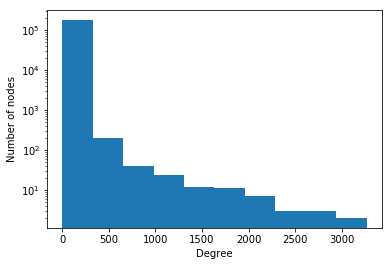

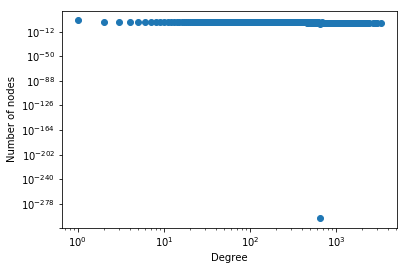

In [27]:
analyze("c++_complete_ordered_list.txt")

**Python**

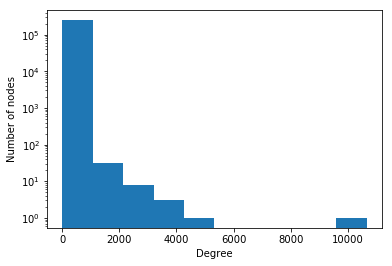

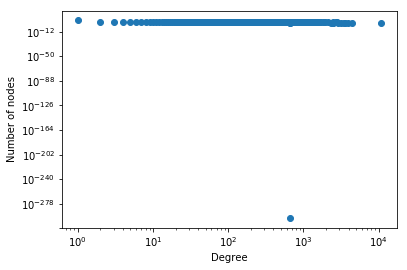

In [11]:
analyze("python_complete_ordered_list.txt")

**Pandas**

My network has 18124 nodes.
My network has 42881 edges.
My Erdős–Rényi network has 18124 nodes.
My Erdős–Rényi network has 43140 edges.
My Barabási-Albert network has 18124 nodes.
My Barabási-Albert network has 54363 edges.
Clustering coeeficient:
0.05916020274012231


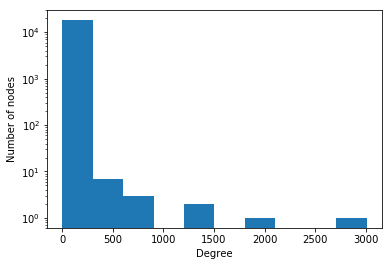

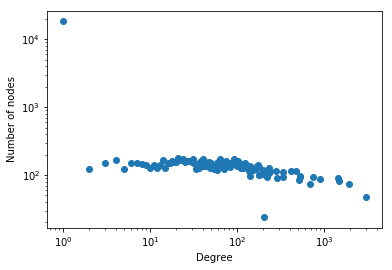

In [30]:
analyze("pandas_complete_ordered_list.txt")

**Numpy**

My network has 21728 nodes.
My network has 40452 edges.
My Erdős–Rényi network has 21728 nodes.
My Erdős–Rényi network has 40446 edges.
My Barabási-Albert network has 21728 nodes.
My Barabási-Albert network has 43452 edges.
Clustering coeeficient:
0.019031623710123964


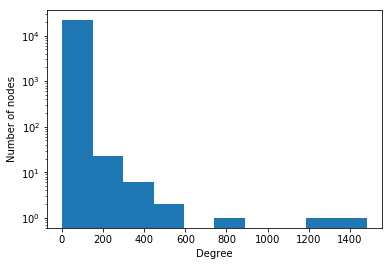

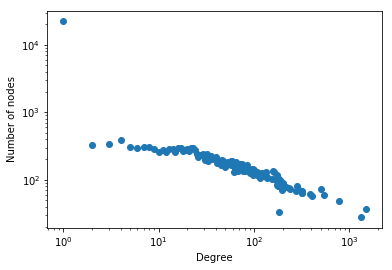

In [32]:
analyze("numpy_complete_ordered_list.txt")

**Matplotlib**

My network has 13302 nodes.
My network has 19601 edges.
My Erdős–Rényi network has 13302 nodes.
My Erdős–Rényi network has 19591 edges.
My Barabási-Albert network has 13302 nodes.
My Barabási-Albert network has 26600 edges.
Clustering coeeficient:
0.008734176645022206


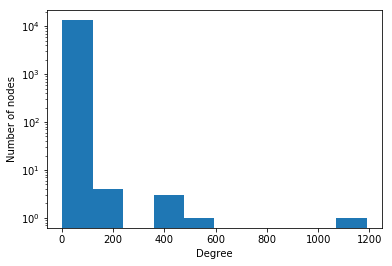

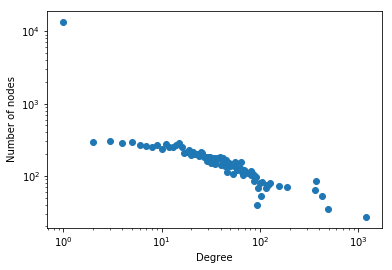

In [33]:
analyze("matplotlib_complete_ordered_list.txt")

**NetworkX**

My network has 1234 nodes.
My network has 1231 edges.
My Erdős–Rényi network has 1234 nodes.
My Erdős–Rényi network has 1236 edges.
My Barabási-Albert network has 1234 nodes.
My Barabási-Albert network has 1233 edges.
Clustering coeeficient:
0.0035562265145641105


ValueError: matrix type must be 'f', 'd', 'F', or 'D'

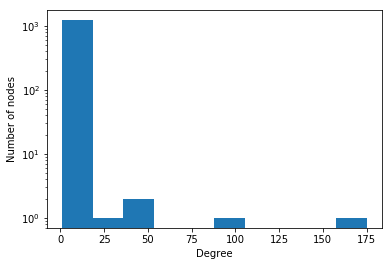

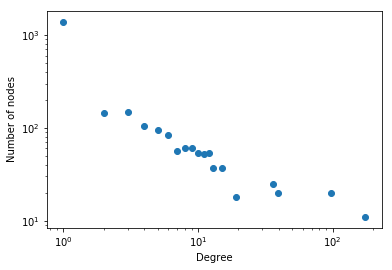

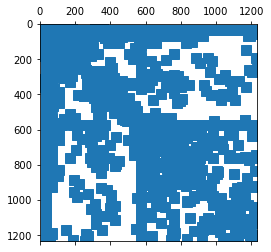

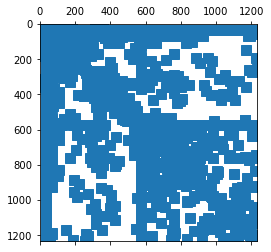

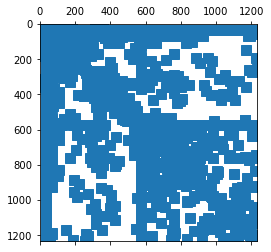

In [59]:
analyze("networkx_complete_ordered_list.txt")

**Eigen**

My network has 1193 nodes.
My network has 1258 edges.
My Erdős–Rényi network has 1193 nodes.
My Erdős–Rényi network has 1283 edges.
My Barabási-Albert network has 1193 nodes.
My Barabási-Albert network has 2382 edges.
Clustering coeeficient:
0.008514710635495007


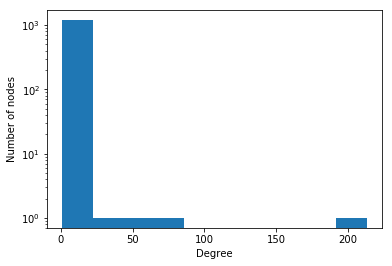

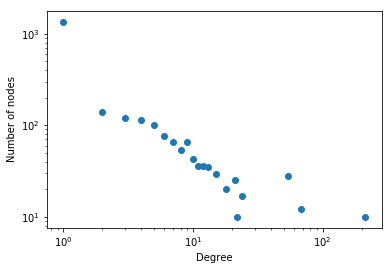

In [35]:
analyze("eigen_complete_ordered_list.txt")

**Torch**

My network has 355 nodes.
My network has 379 edges.
My Erdős–Rényi network has 355 nodes.
My Erdős–Rényi network has 351 edges.
My Barabási-Albert network has 355 nodes.
My Barabási-Albert network has 706 edges.
Clustering coeeficient:
0.0007200105717526029


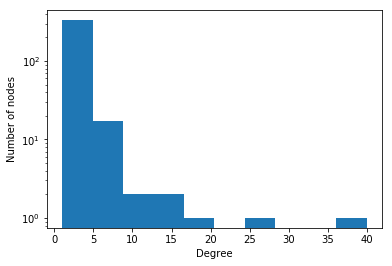

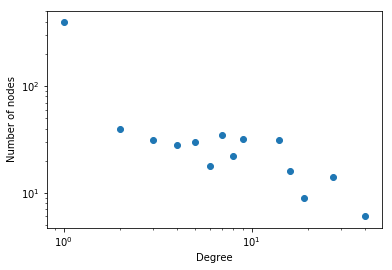

In [36]:
analyze("torch_complete_ordered_list.txt")

**Pytorch**

My network has 100 nodes.
My network has 94 edges.
My Erdős–Rényi network has 100 nodes.
My Erdős–Rényi network has 93 edges.
My Barabási-Albert network has 100 nodes.
My Barabási-Albert network has 99 edges.
Clustering coeeficient:
0.012252747252747252


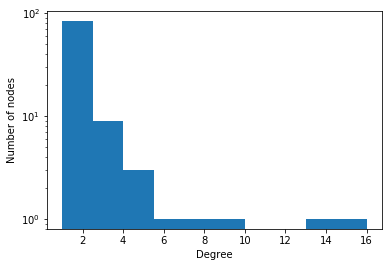

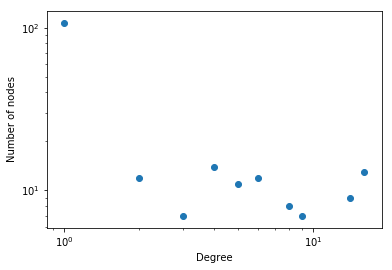

In [37]:
analyze("pytorc_complete_ordered_list.txt")

**Tensorflow**

In [40]:
analyze("tensorflow_complete_ordered_list.txt")

TypeError: Failed to convert time data 2015-11-09T14:05:45.853 to type <class 'int'>.

**Old:**

(array([  1.81100000e+04,   7.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   3.01700000e+02,   6.02400000e+02,
          9.03100000e+02,   1.20380000e+03,   1.50450000e+03,
          1.80520000e+03,   2.10590000e+03,   2.40660000e+03,
          2.70730000e+03,   3.00800000e+03]),
 <a list of 10 Patch objects>)

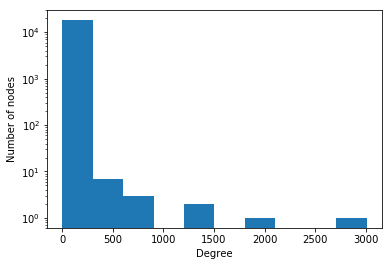

In [23]:
network_path = os.path.join("Tags", "pandas_complete_ordered_list.txt")
network = nx.read_edgelist(network_path,nodetype=int, data=(('time',int),('votes_q', int),('votes_a', int),('accepted', bool)))

network_cleaned = clean.filter_network_attributes(network, min_time, max_time,\
                min_q_votes, max_q_votes, min_a_votes, max_a_votes, accepted)

if only_gc:
    network_cleaned = clean.filter_network_gc(network_cleaned)
    
len(network.nodes())
len(network.edges())

nx.number_connected_components(network)
network.number_of_selfloops ()
np.asarray(list(network.degree(network.nodes()).values())).mean()
degrees_dict = network.degree()
degrees = np.asarray([ [key,degrees_dict[key]] for key in degrees_dict])
plt.yscale('log')
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.hist(degrees[:,1])


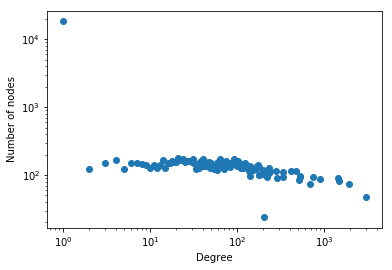

In [24]:
degrees_unique = np.unique(degrees[:,1])
degrees_num, tmp = np.histogram(degrees, bins=degrees_unique.shape[0])
plt.yscale('log')
plt.xscale('log')
plt.ylabel("Number of nodes")
plt.xlabel("Degree")
plt.scatter(degrees_unique, degrees_num)

## Conclusion